# Modelling a Hadamard Walk with our Quantum Galton Board

In this notebook, we use our quantum galton board to approximate the distribution produced by a symmetric hadamard walk along a 1D lattice. This naturally requires us to consider carefully the differences in the two models. Hadamard walks take place along a 1D lattice, which means that for n decisions, we have 2n+1 possible end locations (starting in the middle, and a max of n steps either side). In contrast, the Galton board has n+1 output bins for n layers. Thus, the number of decisions we decide our hadamard walk to have (n) will require 2n+1 output bins, and so need a QGB with 2n layers to represent.

We demonstrate our results as follows:
- approximate a symmetric hadamard walk using our biased galton board
- repeat this using the noise model
- calculate distance metrics, accounting for stochastic uncertainty

Note that for the latter, we provide a selection of the possible metrics - see the docstring for other options.

## Step 1: Approximate a Symmetric Hadamard Walk Using the biased QGB

In [1]:
import os
os.chdir("..")
print(os.getcwd())

c:\Users\hayde\Desktop\Womanium 2025\quantum_nnl_project


In [2]:
from src.quantum_walk import *
from src.galton_box import *
from utils.plot_utils import *
from utils.distance_metrics_utils import *

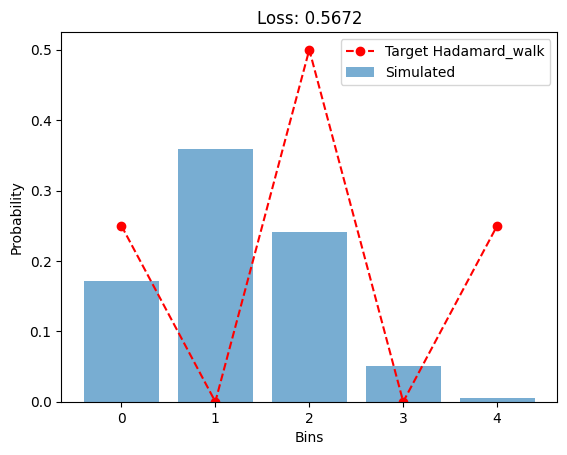

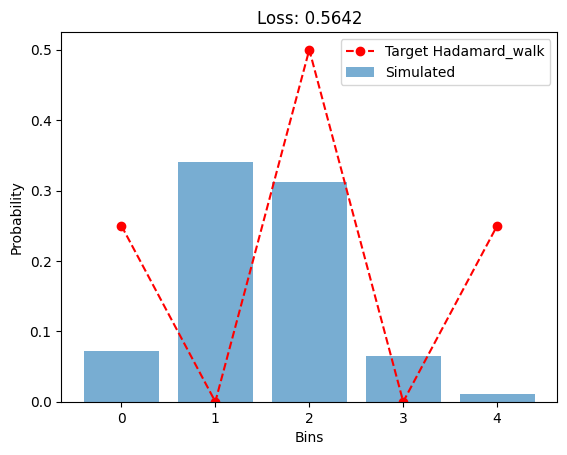

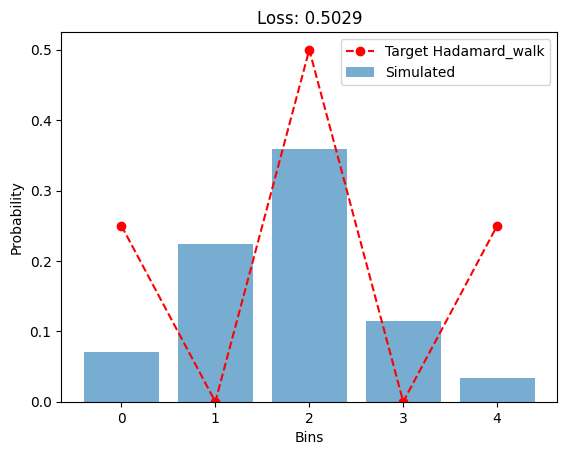

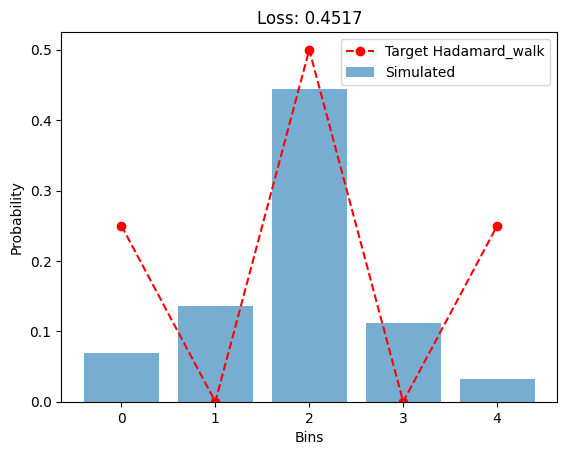

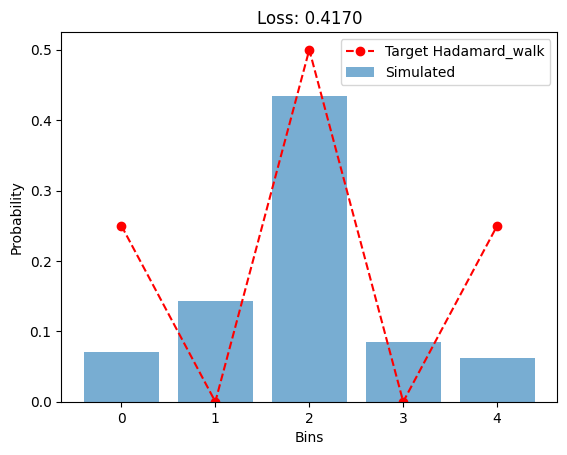

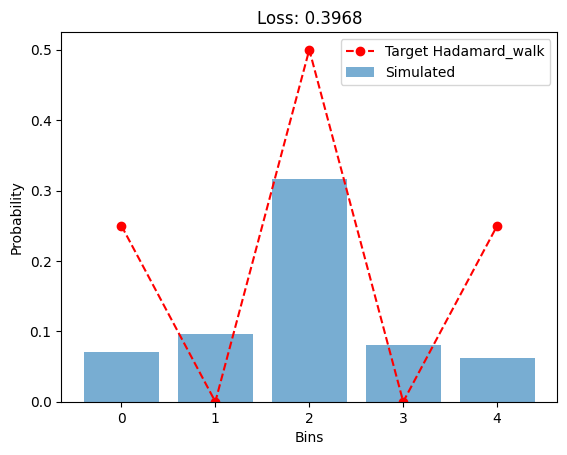

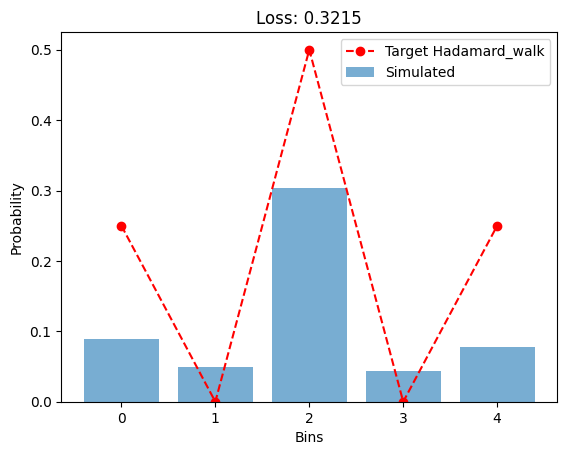

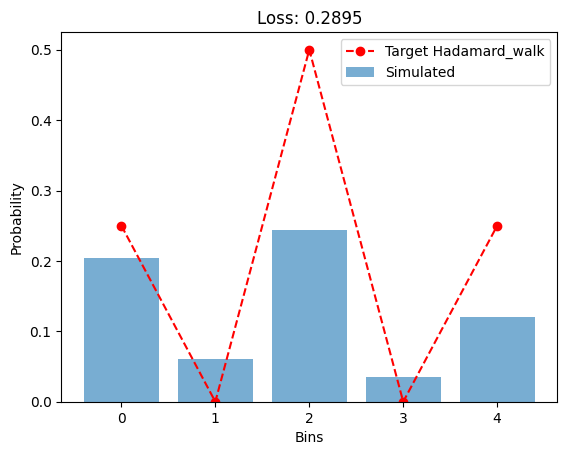

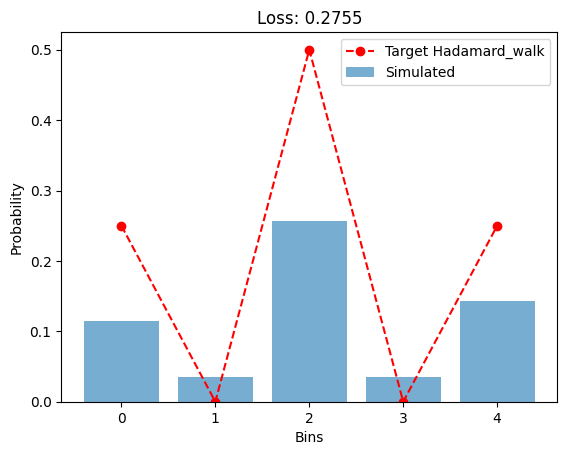

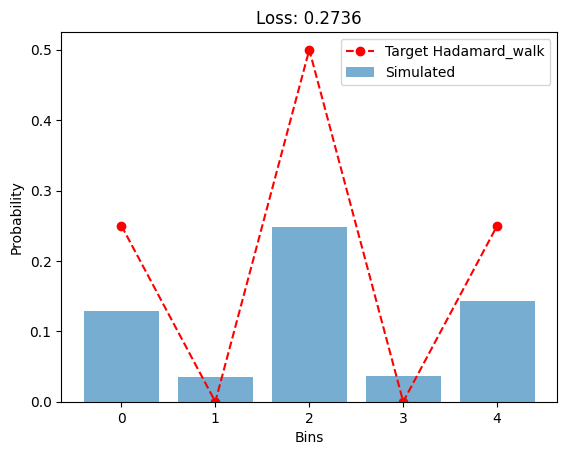

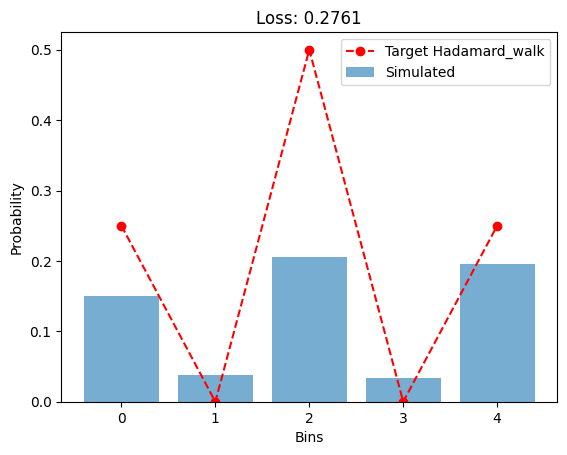

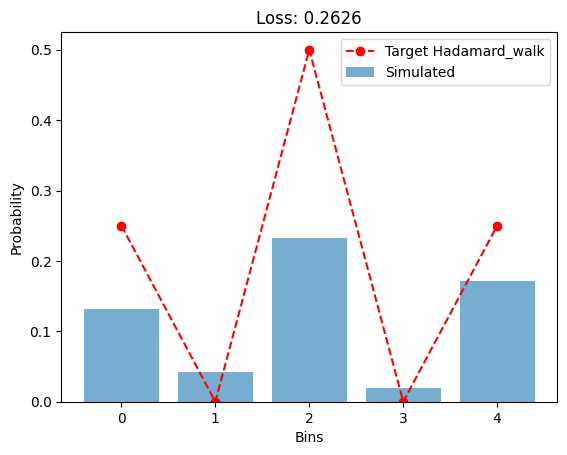

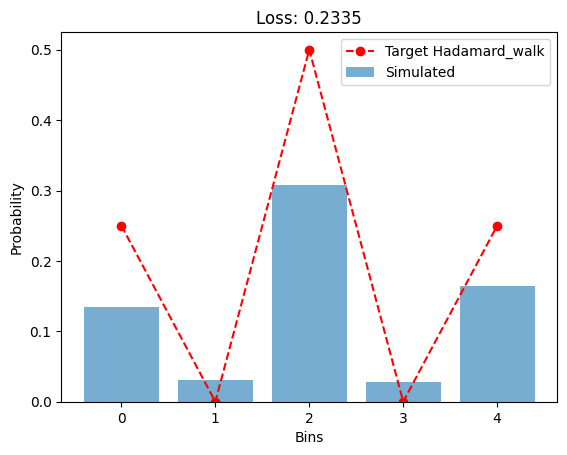

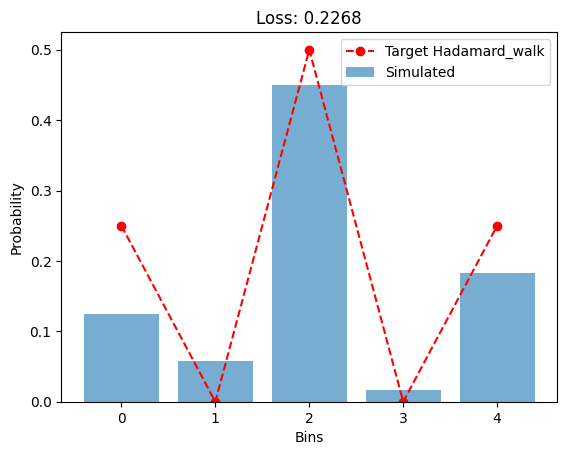

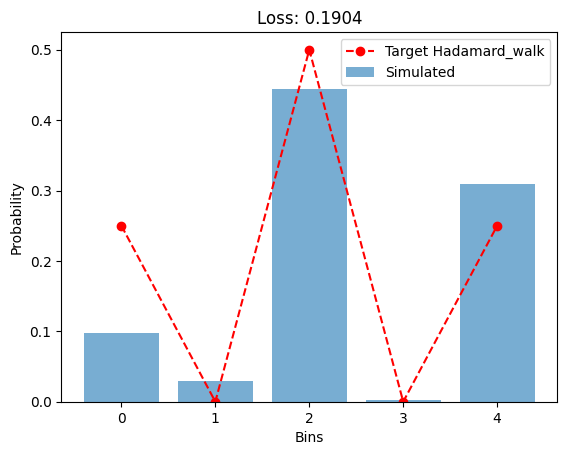

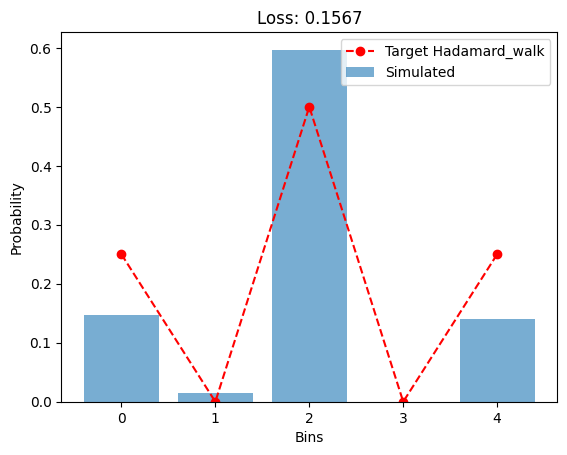

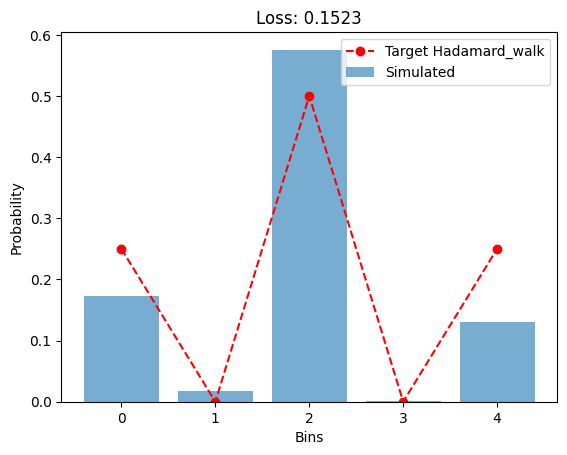

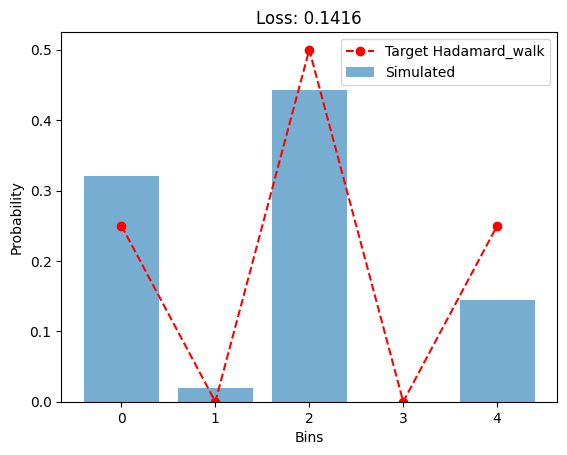

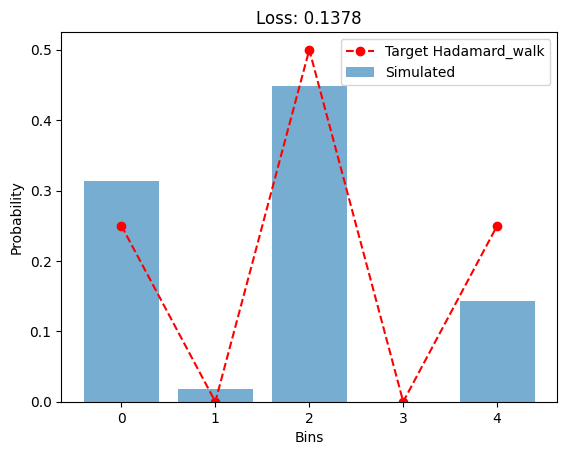

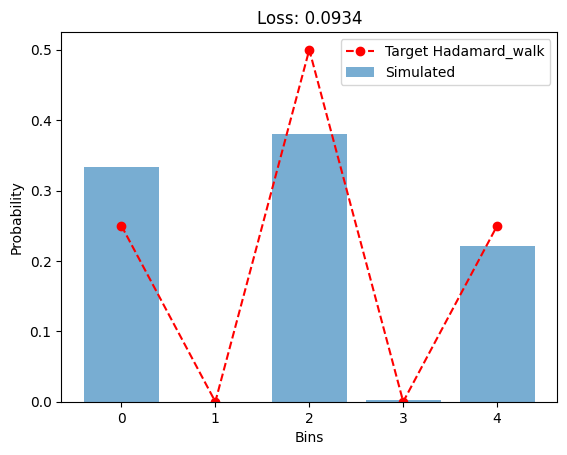

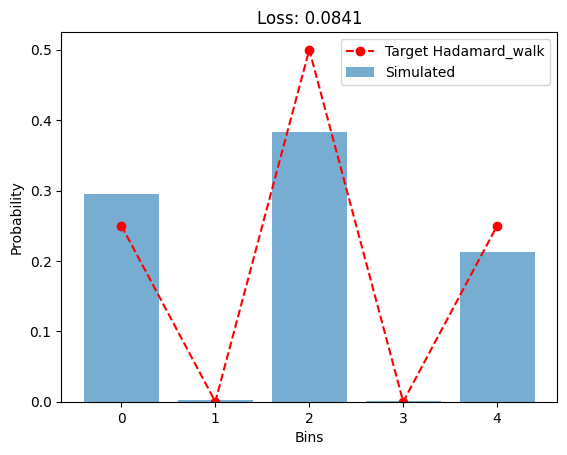

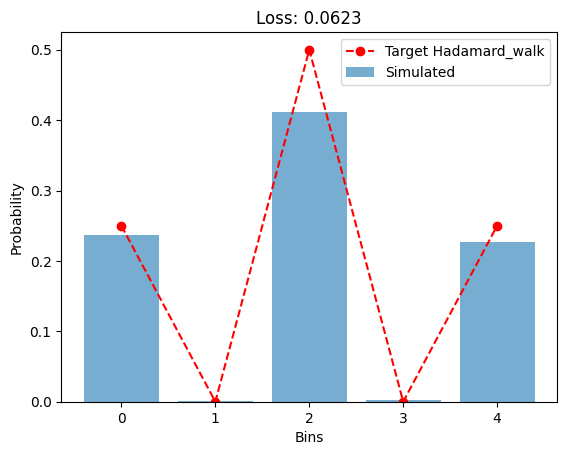

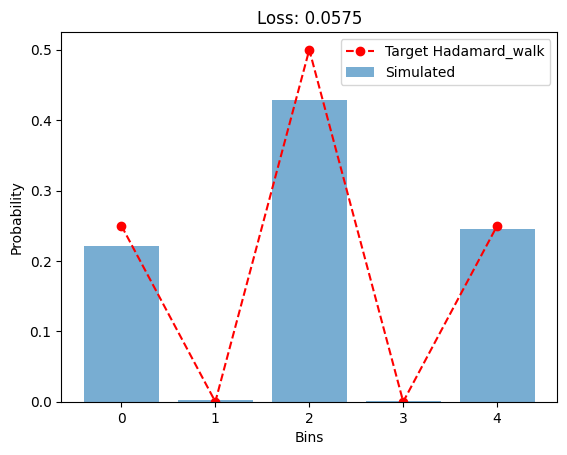

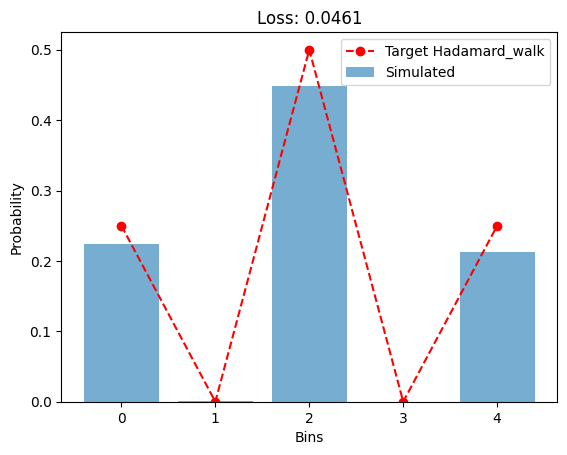

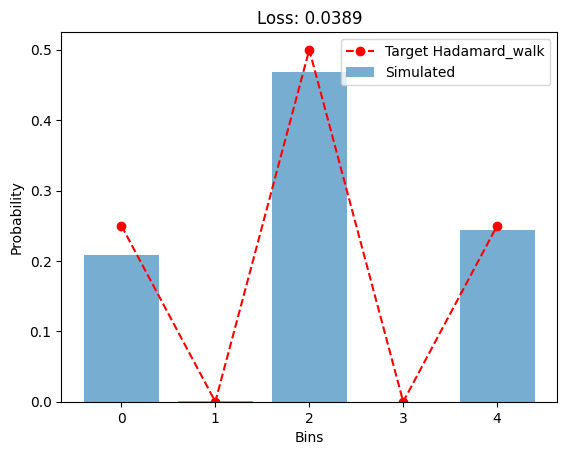

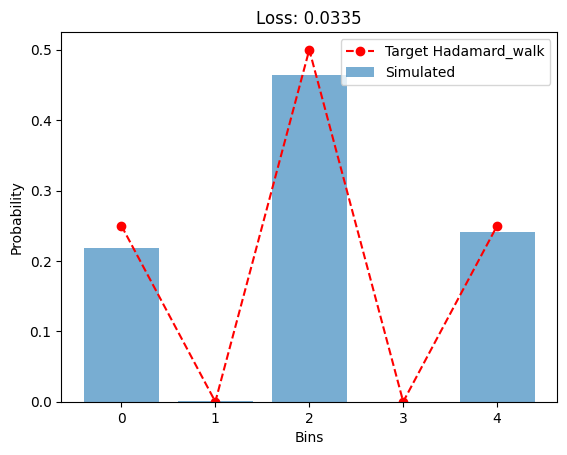

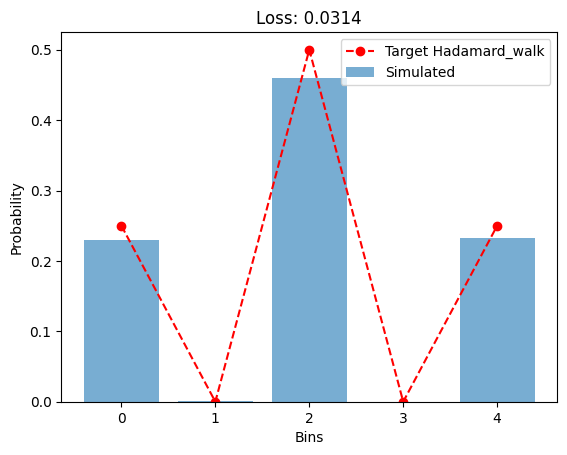

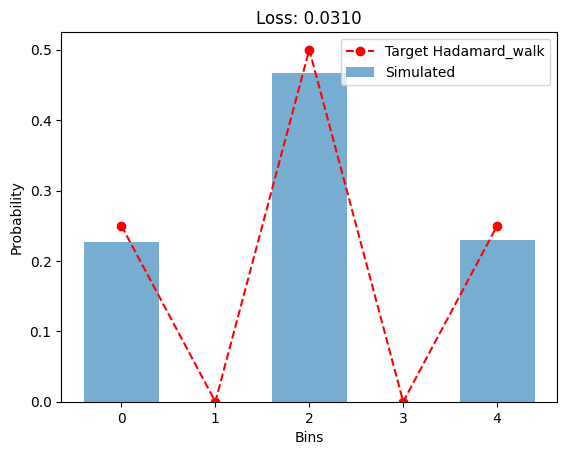

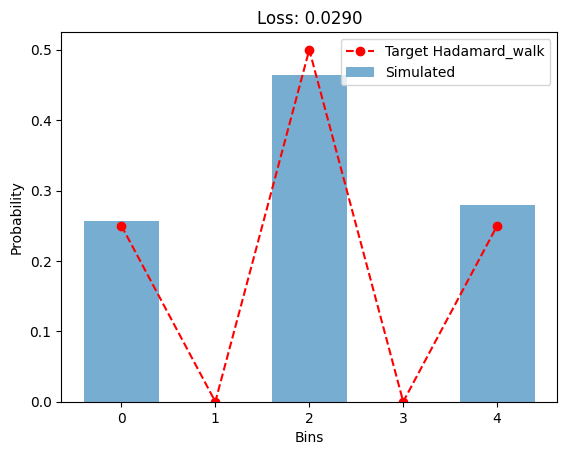


Time limit reached. Forcing optimization to stop.

Optimization stopped due to time limit.

Optimizer exit (best loss): 0.036634157647553484
Best Optimized thetas: [ 1.70681022  1.6324618   1.3246076   2.4894112   3.14923654 -0.02766529
  3.14590263  0.0130773   0.0294336   0.0592413 ]
Best Loss: 0.02901084774362786


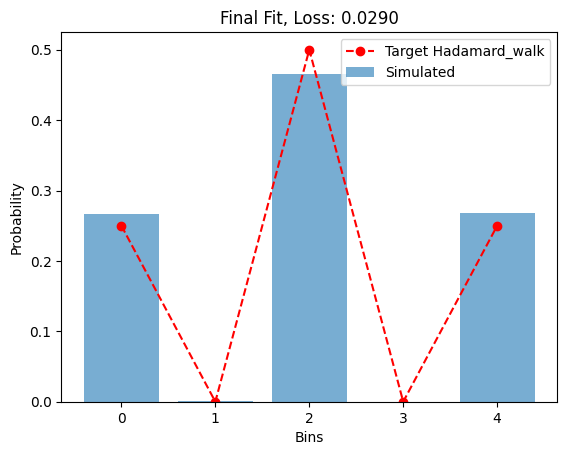

In [ ]:
n_dec = 2 # number of decisions in H Walk
n = 2*n_dec # number of layers QGB therefore needs to represent outcome of H walk

res = optimise_layerwise(n=n, shots=5000, max_time=360, target="hadamard_walk") # try adjusting shots or n_dec if having issues. Loss function uses Hellinger Distance

## Step 2: View Final Result and Calculate Distance Metrics

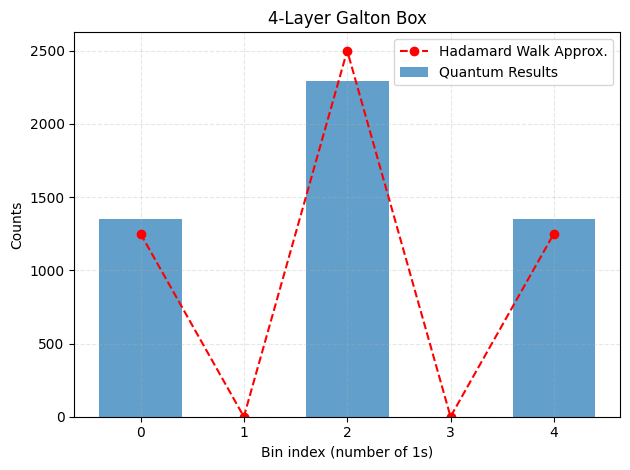

0.04061624649859945
0.0810324129651861
0.029866921021816067
0.030378352333019106


In [9]:
bin_counts = biased_galton_n_layer(n=n, shots=5000, mode="full", thetas=res[0])
plot_bins(bin_counts, n=n, overlay="hadamard_walk", shots=5000)
print(distribution_distance(bin_counts, target_distribution="hadamard_walk", n_dec=n_dec, metric="tvd")) # TVD
print(distribution_distance(bin_counts, target_distribution="hadamard_walk", n_dec=n_dec, metric="w1")) # 1D Wasserstein-1 Distance
print(distribution_distance(bin_counts, target_distribution="hadamard_walk", n_dec=n_dec, metric="js")) # Jensen-Shannon Distance
print(distribution_distance(bin_counts, target_distribution="hadamard_walk", n_dec=n_dec, metric="hel")) # Hellinger Distance

## Step 3: See Result with Noise and Calculate New Distance Metric

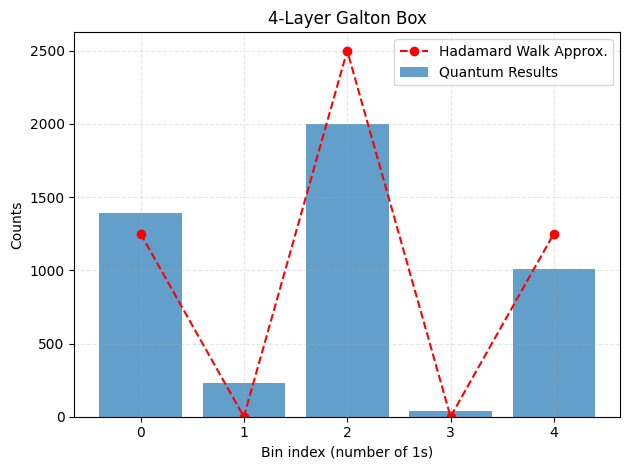

0.10553651745555795
0.20561147997429868
0.151926854948429
0.1787617609514719


In [ ]:
bin_counts = biased_galton_n_layer(n=n, shots=5000, mode="full", thetas=res[0], noise=True)
plot_bins(bin_counts, n=n, overlay="hadamard_walk", shots=5000)
print(distribution_distance(bin_counts, target_distribution="hadamard_walk", n_dec=n_dec, metric="tvd")) # TVD
print(distribution_distance(bin_counts, target_distribution="hadamard_walk", n_dec=n_dec, metric="w1")) # 1D Wasserstein-1 Distance
print(distribution_distance(bin_counts, target_distribution="hadamard_walk", n_dec=n_dec, metric="js")) # Jensen-Shannon Distance
print(distribution_distance(bin_counts, target_distribution="hadamard_walk", n_dec=n_dec, metric="hel")) # Hellinger Distance
# unsurprisingly, adding noise increases the distribution distance

## Step 4: Perform Multiple Runs and Average Result to Account for Stochastic Uncertainty

In [10]:
metrics = []
for i in range(50):
    bin_counts = biased_galton_n_layer(n=n, shots=1000, mode="full", thetas=res[0], noise=True)
    metric = distribution_distance(bin_counts, target_distribution='hadamard_walk', n_dec=n_dec) # we use TVD here, but can change as per docstring
    metrics.append(metric)
print(significance_test(metrics, test_type='t', significance_level=0.05, threshold=0.1)) # setting an acceptability threshold of 0.1
# Note that noise model results are slightly worse, as we would expect

Normality assumption is valid.
Mean Distance: 0.095497896555292
Standard Deviation: 0.01683740050178618
Test Statistic: -1.890712212386108
P-Value: 0.967708284644921
Significance Level: 0.05
Given that the p-value is > the significance level, we accept the Null Hypothesis that the population mean of the distances calculated is within the acceptable threshold. Thus, we conclude that the distance between the observed and target distributions is not statistically significant at this significance level.
